# Corpus File Preprocessing for Word2Vec:
## 1. Load and read the corpus.
## 2. Tokenize the text.
## 3. Lowercase all words.
## 4. Remove stop words and non-alphabetic words.
## 5. (Optional) Lemmatize words.
## 6. Optionally, subsample frequent words.
## 7. Prepare the corpus for Word2Vec (list of tokenized sentences).
## 8. Train the Word2Vec model using Gensim or other frameworks.

In [3]:
import gensim
from gensim.models import Word2Vec

import nltk
from nltk.tokenize import word_tokenize
#nltk.download('stopwords')
#nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import spacy
# Load the Italian model
nlp = spacy.load("it_core_news_sm")

import pandas as pd

In [4]:
with open(r"C:\Users\ACARUGAT\Documents\Varie\Testi\Letteratura\Corpus.txt", "r", encoding="utf-8") as file:
    corpus = file.readlines()

In [5]:
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]

In [6]:
stop_words = set(stopwords.words('italian'))
cleaned_corpus = [[word for word in sentence if word not in stop_words] for sentence in tokenized_corpus]

In [7]:
cleaned_corpus = [[word for word in sentence if word.isalpha()] for sentence in cleaned_corpus]

In [8]:
lemmatizer = WordNetLemmatizer()

lemmatized_corpus = [[lemmatizer.lemmatize(word) for word in sentence] for sentence in cleaned_corpus]

In [9]:
lemmatized_corpus = []

for sentence in cleaned_corpus:
    # Process each sentence with spaCy NLP pipeline
    doc = nlp(" ".join(sentence))
    # Extract lemmatized words
    lemmatized_sentence = [token.lemma_ for token in doc]
    lemmatized_corpus.append(lemmatized_sentence)

In [10]:
#print ("Original Corpus = ", corpus)
#print ("Tokenized Corpus = ", tokenized_corpus)
#print ("Cleaned Corpus = ", cleaned_corpus)
print ("Lemmatized Corpus = ", lemmatized_corpus[0:99])

Lemmatized Corpus =  [['storia', 'potere', 'veramente', 'chiamare', 'guerra', 'illustre', 'morto', 'richiamira', 'sepolcro', 'anno', 'già', 'incadaverito', 'passare', 'nuovo', 'rassegna', 'ordinare', 'nuovo', 'battaglia', 'onde', 'perspicace', 'ingegne', 'arringo', 'raccolgere', 'palme', 'conservare', 'nome', 'immortalità', 'altro', 'conferire', 'nobile', 'campione', 'memoria', 'obblio', 'furtare', 'splendido', 'rapire', 'soltanto', 'spoglia', 'ricco', 'brillante', 'imbalsamare', 'inchiostro', 'fatto', 'principio', 'potentato', 'gran', 'personaggio', 'tessere', 'feral', 'telare', 'battaglia', 'trapuntare', 'collo', 'ago', 'finissimo', 'ingegno', 'filo', 'd', 'oro', 'seta', 'formare', 'perpetuo', 'ricamo', 'azione', 'glorioso', 'però', 'debolezza', 'ingegno', 'concedere', 'vittoria', 'osservare', 'lungo', 'giro', 'anno', 'molto', 'straordinario', 'vicenda', 'quale', 'sembrare', 'degno', 'memoria', 'memoria', 'defraudare', 'essere', 'avvenere', 'gran', 'parte', 'persona', 'meccanico', 'b

In [13]:
with open(r"C:\Users\ACARUGAT\Documents\Varie\Testi\Letteratura\Corpus-PP.txt", "w", encoding="utf-8") as file:
    for sentence in lemmatized_corpus:
        file.write(" ".join(sentence) + "\n")

In [14]:
# Train the Word2Vec model
model = Word2Vec(sentences=lemmatized_corpus, vector_size=100, window=5, min_count=5, workers=4)

# Save the trained model
model.save("word2vec_model.model")

In [ ]:
print (model.wv.get_vecattr("lago", "count"))
print (model.wv.most_similar("lago"))
print (model.wv.similarity("lago", "fiume"))

In [ ]:
# Train the Word2Vec model with more epochs
model = Word2Vec(sentences=lemmatized_corpus, vector_size=100, window=5, min_count=5, workers=4, epochs=100, sg=0)

In [ ]:
print (model.wv.get_vecattr("lago", "count"))
print (model.wv.most_similar("lago"))
print (model.wv.similarity("lago", "fiume"))

In [ ]:
# Train the Word2Vec model with more epochs and Skip-Grammar
model = Word2Vec(sentences=lemmatized_corpus, vector_size=100, window=5, min_count=5, workers=4, epochs=100, sg=1)

In [ ]:
print (model.wv.get_vecattr("lago", "count"))
print (model.wv.most_similar("lago"))
print (model.wv.similarity("lago", "fiume"))

In [23]:
from itertools import chain

# Flatten the list
flattened_corpus = list(chain.from_iterable(lemmatized_corpus))

# Get unique tokens
parole_presenti = list(set(flattened_corpus))

In [25]:
#In Gensim's Word2Vec, the vocabulary already contains unique words
tokens_unici= list(model.wv.index_to_key)
print (tokens_unici[1:10])
    

['fare', 'quello', 'potere', 'altro', 'cosa', 'vedere', 'volere', 'andare', 'essere']


In [27]:
tabella = []
for parola in tokens_unici:
    print (parola)
    c=model.wv.get_vecattr(parola,"count")
    tabella.append({"Parola":parola, "Frequenza":c})
df=pd.DataFrame(tabella)
print (df.sort_values(by=["Frequenza", "Parola"], ascending=False, ignore_index=True))

dire
fare
quello
potere
altro
cosa
vedere
volere
andare
essere
sapere
così
tanto
venire
bene
poi
dare
signore
quando
qualche
tempo
dovere
senza
due
buono
egli
parte
trovare
don
mano
ogni
tutto
renzo
molto
poco
ora
parola
casa
uomo
padre
lucia
pensare
qui
pure
perché
già
de
giorno
sempre
d
ancora
dopo
certo
nuovo
tale
via
me
mai
gran
volta
momento
mezzo
sentire
rispondere
quale
povero
solo
son
prima
stesso
ciò
lasciare
donna
primo
parlare
fermo
esso
avere
né
po
passare
abbondio
conte
allora
voce
prendere
però
mettere
tenere
portare
pensiero
agnese
alcuno
nessuno
tornare
modo
luogo
parere
troppo
gente
nome
dio
strada
rodrigo
male
oh
fino
cercare
fra
quasi
occhio
entrare
vero
nulla
fuori
caso
ragione
rimanere
credere
paese
forse
bello
forza
subito
guardare
insieme
sopra
ella
grande
cristoforo
cuore
passo
verso
sì
bisognare
storia
meno
vita
tosto
s
bisogno
chiamare
persona
meglio
là
dunque
sotto
lontano
cominciare
capo
no
Milano
madre
que
lungo
stato
cardinale
proprio
domandare
dietro
inte

storia:423
potere:3454
veramente:111
chiamare:397
guerra:153
illustre:17
morto:128
richiamira:1
sepolcro:3
anno:232
già:932
incadaverito:1
passare:677
nuovo:860
rassegna:7
ordinare:90
battaglia:46
onde:51
perspicace:1
ingegne:10
arringo:4
raccolgere:17
palme:4
conservare:38
nome:543
immortalità:2
altro:2771
conferire:10
nobile:79
campione:4
memoria:157
obblio:4
furtare:1
splendido:30
rapire:17
soltanto:158
spoglia:19
ricco:54
brillante:10
imbalsamare:5
inchiostro:6
fatto:343
principio:142
potentato:7
gran:818
personaggio:127
tessere:3
feral:2
telare:4
trapuntare:2
collo:97
ago:1
finissimo:4
ingegno:33
filo:59
d:915
oro:6
seta:44
formare:65
perpetuo:272
ricamo:6
azione:61
glorioso:23
però:631
debolezza:46
concedere:59
vittoria:39
osservare:76
lungo:359
giro:67
molto:1100
straordinario:70
vicenda:67
quale:781
sembrare:65
degno:90
defraudare:1
essere:2249
avvenere:3
parte:1229
persona:396
meccanico:11
basso:143
condizione:130
avere:693
portata:6
mutatione:1
ruoto:4
stato:358
stimare:26
la

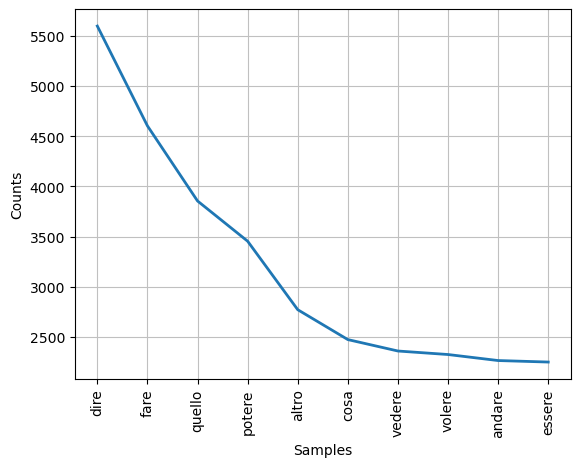

In [29]:
freq_dist=nltk.FreqDist(flattened_corpus)
freq_dist.plot(10, cumulative=False)
for k,v in freq_dist.items():
    print (str(k) + ':' + str (v))
